In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1,skip_blank_lines=False)


In [114]:
na_index = df[df.isnull().any(axis=1)].index
alpha_df = df[df.iloc[:,0].str.isalpha()].index[0]
df = df.drop(index=na_index)
df = df.drop(index=alpha_df)

In [88]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [115]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.5+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,243,243,243,243,243,243,243,243,243,243,243,243,243,243
unique,31,4,1,19,62,18,39,173,165,197,106,173,126,8
top,01,08,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,243,29,10,43,133,7,5,5,8,5,12,131


In [116]:
print(df.duplicated().all())
print(df.drop_duplicates(subset=None, keep = 'first', inplace=True))

False
None


In [117]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [122]:
df['Classes'] = df['Classes'].str.strip().map({'fire': 1, 'not fire': 0})

In [140]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm',axis=None)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,-0.000369,nan,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840
month,-0.000369,1.000000,nan,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Temperature,0.097227,-0.056781,nan,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.076034,-0.041252,nan,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,0.047812,-0.039880,nan,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.112523,0.034822,nan,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.224956,0.017030,nan,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.491514,0.067943,nan,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.527952,0.126511,nan,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123


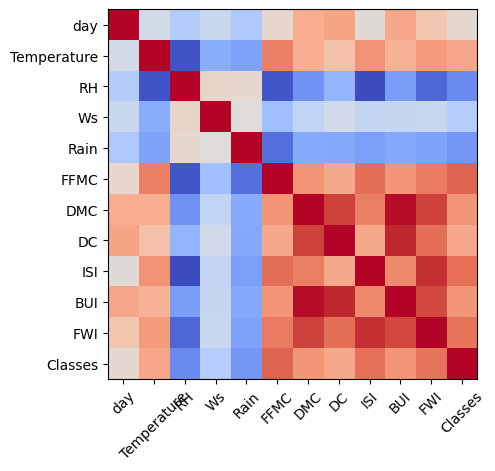

In [144]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.imshow(correlation_matrix,cmap='coolwarm', interpolation='none')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
correlation_matrix.style.background_gradient(cmap='coolwarm')
plt.show()

In [142]:
df = df.drop(['year','month'],axis=1)

In [143]:
df

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,02,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,04,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,05,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,27,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [149]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [151]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9795918367346939
